In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import AFAI_library as afai
import AFAI_library_torch as afai_cuda
import AFAI_parallelGPU as afai_parallel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [3]:
%autoreload 2

In [15]:
period = 2
hopping = - 3 * np.pi/(2)
model = afai_cuda.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)
model_gpu = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping, 3,3)

In [30]:
hopping1 = - np.pi/(2)
hopping2 = - 3 * np.pi/(2)
hopping3 = - 5 * np.pi/(2)

In [31]:
model_pest1 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping1, num_y=1, device='cuda')
model_pest2 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping2, num_y=1, device='cuda')
model_pest3 = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping3, num_y=1, device='cuda')

In [32]:
branch_cut_angles = torch.linspace(-torch.pi, torch.pi, 30)

tensor(0., device='cuda:0', dtype=torch.float64)
tensor([-4.6350e-18,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  2.5872e-02,  1.0240e-01,  2.0265e-04, -1.5796e-09,
        -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09,
        -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09, -1.5796e-09,
        -1.5796e-09,  2.0265e-04,  1.0240e-01,  2.5872e-02, -4.6350e-18,
        -4.6350e-18, -4.6350e-18, -4.6350e-18, -4.6350e-18,  0.0000e+00],
       device='cuda:0')


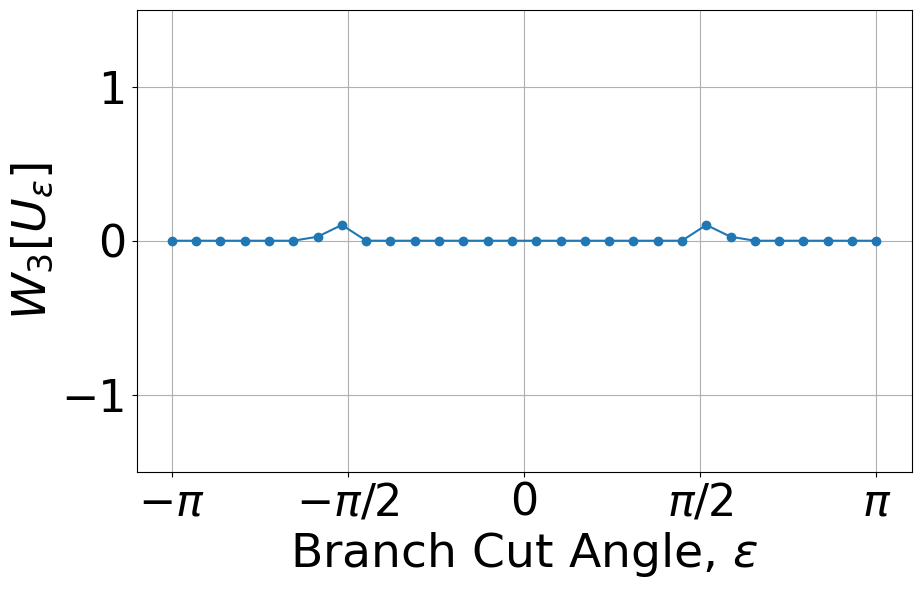

In [58]:
w1 = model_pest1.winding3(0, 5, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 23 23 15
p tensor([6.0214, 6.0214, 1.2500], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0777,  0.0777],
        [-0.0390,  0.0390],
        [-0.0959,  0.0959]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


tensor(1., device='cuda:0', dtype=torch.float64)
tensor([ 1.9607e-17,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -5.6390e-01, -7.0700e-01, -7.9778e-01, -8.5436e-01, -7.1955e-01,
        -8.3167e-01, -8.7077e-01, -9.4253e-01, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -9.4253e-01, -8.7077e-01, -8.3167e-01,
        -7.1955e-01, -8.5436e-01, -7.9778e-01, -7.0700e-01, -5.6390e-01,
         1.9607e-17,  1.9607e-17,  1.9607e-17,  1.9607e-17,  0.0000e+00],
       device='cuda:0')


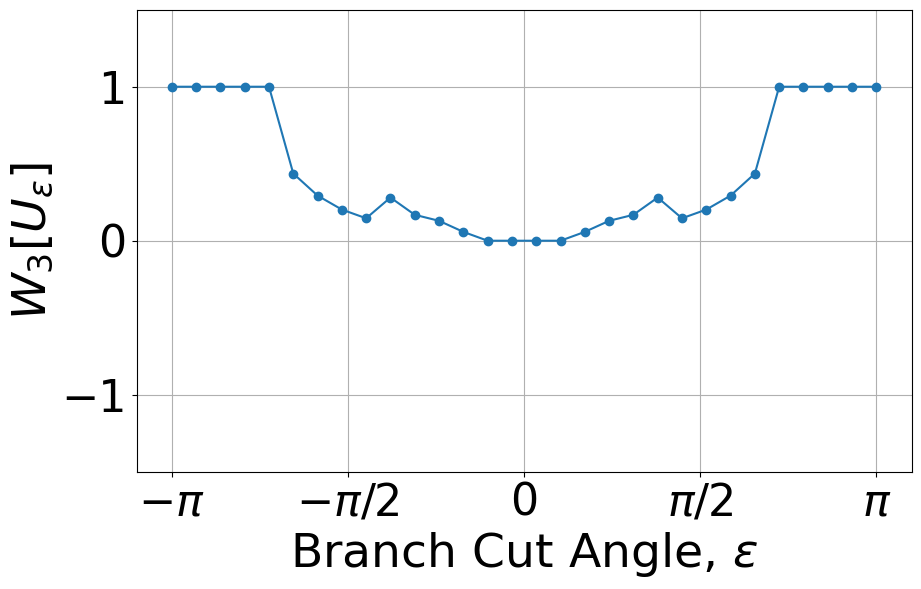

In [51]:
w2 = model_pest2.winding3(0, 24, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 23 23 15
p tensor([6.0214, 6.0214, 1.2500], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0777,  0.0777],
        [-0.0390,  0.0390],
        [-0.0959,  0.0959]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


tensor(1., device='cuda:0', dtype=torch.float64)
tensor([ 1.9607e-17,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -5.6390e-01, -7.0700e-01, -7.9778e-01, -8.5436e-01, -7.1955e-01,
        -8.3167e-01, -8.7077e-01, -9.4253e-01, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -9.4253e-01, -8.7077e-01, -8.3167e-01,
        -7.1955e-01, -8.5436e-01, -7.9778e-01, -7.0700e-01, -5.6390e-01,
         1.9607e-17,  1.9607e-17,  1.9607e-17,  1.9607e-17,  0.0000e+00],
       device='cuda:0')


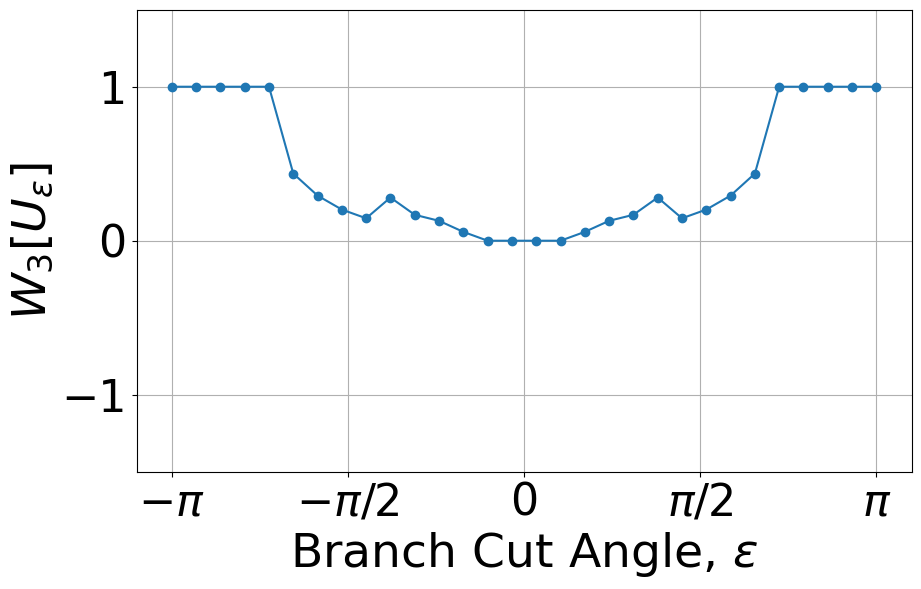

In [74]:
w2 = model_pest2.winding3(0, 24, 100, branch_cut_angles, plot=True)

In [ ]:
w2 = model_pest2.winding3(0, 50, 100, branch_cut_angles, plot=True)

($i_1, i_2, i_3$) 0 0 1
p tensor([0.0000, 0.0000, 0.4000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([-1.,  1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[ 0.4793, -0.4793],
        [-0.1683,  0.1683],
        [-0.0044,  0.0044]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


($i_1, i_2, i_3$) 0 0 2
p tensor([0.0000, 0.0000, 0.8000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([ 1., -1.], device='cuda:0', dtype=torch.float64)
$M_p$ tensor([1., 0.], device='cuda:0', dtype=torch.float64)
$F_p$ tensor([[-0.0314,  0.0314],
        [-0.1949,  0.1949],
        [-0.4128,  0.4128]], device='cuda:0', dtype=torch.float64)
$m_p$ tensor([[0, 0],
        [0, 0],
        [0, 0]], device='cuda:0')


($i_1, i_2, i_3$) 0 2 3
p tensor([0.0000, 2.5133, 1.2000], device='cuda:0', dtype=torch.float64)
$C_p$ tensor([-1.,  1.], device='cuda:0', dtype=torch.f

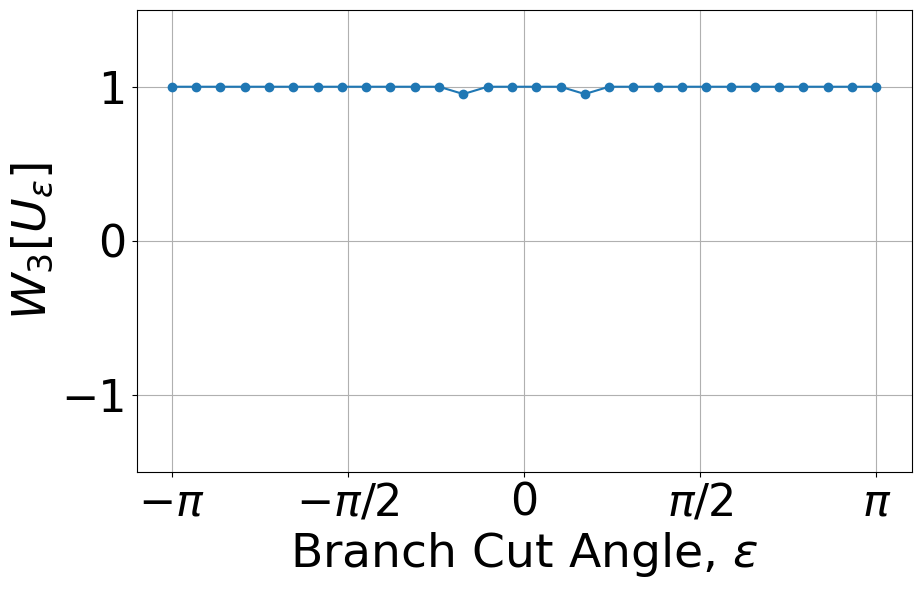

In [57]:
w3 = model_pest3.winding3(0, 5, 100, branch_cut_angles, plot=True)

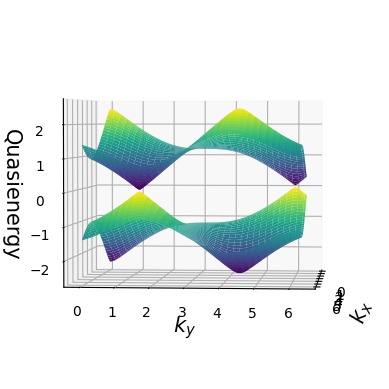

In [21]:
aa = model_pest2.quasienergy_eigenstates(1.189, 100, 100, plot=True, pbc='xy')

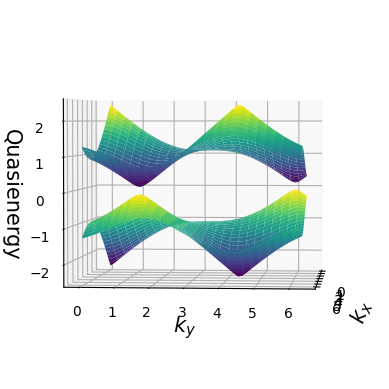

In [18]:
aa = model_pest2.quasienergy_eigenstates(1.25, 50, 100, plot=True, pbc='xy')

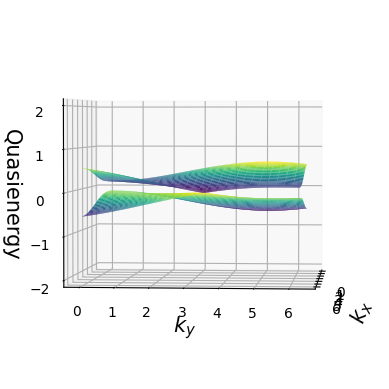

In [37]:
aa = model_pest3.quasienergy_eigenstates(1.52, 50, 100, plot=True, pbc='xy')

In [37]:
tx = torch.tensor([1,2,3], device='cuda:0')
ty = torch.tensor([1,2,3], device='cuda:0')
vd1 = 2
vd2 = torch.tensor([1,2,3], device='cuda:0')

In [27]:
H1 = model_gpu.Hamiltonian_tbc1(ty, tbc='y')
print(H1)

tensor([[[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           1.2731-1.9827j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  2.3562-0.0000j],
         [ 2.3562+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  1.2731+1.9827j,  0.0000+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  2.3562+0.0000j,  0.0000+0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j]],

        [[ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  2.3562-0.0000j,
           0.0000+0.0000j,  0.0000+0.0000j],
         [ 0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,  0.0000+0.0000j,
          -0.9805-2.1425j,  0.0000+0.0000j],
         [ 0.0

In [28]:
H2 = model_gpu.Hamiltonian_tbc2(tx, tbc='xy')
print(H2)

tensor([[[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],

        [[0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562-0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 2.3562+0.j, 0.0000+0.j, 0.0000+0.j],
         [0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j, 0.0000+0.j]],



In [29]:
H3 = model_gpu.Hamiltonian_tbc3(1, tbc='y')
print(H3)

tensor([[[0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 1.2731-1.9827j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          2.3562-0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 1.2731-1.9827j],
         [1.2731+1.9827j, 0.0000+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 2.3562+0.0000j, 0.0000+0.0000j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j],
         [0.0000+0.0000j, 0.0000+0.0000j, 1.2731+1.9827j, 0.0000+0.0000j,
          0.0000+0.0000j, 0.0000+0.0000j]]], device='cuda:0',
       dtype=torch.complex128)


In [59]:
H4 = model_gpu.Hamiltonian_tbc4(1, tbc='xy')
print(H4.shape)

torch.Size([9, 9])


-1.0 0.26625505089759827


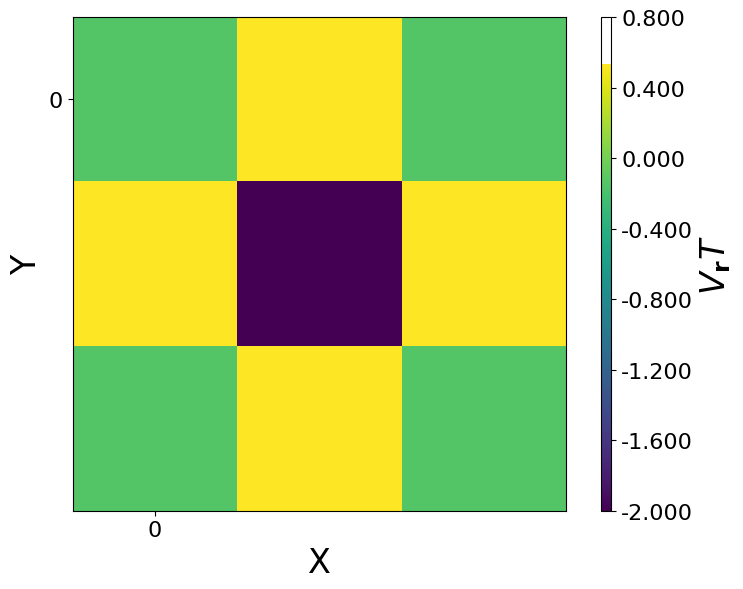

In [45]:
H_ap = model_gpu.aperiodic_Honsite(vd2, contourplot=True)
# print(H_ap)

In [54]:
H_dis = model_gpu.Hamiltonian_disorder(vd1, contourplot=False)
print(H_dis.shape)

torch.Size([1, 9, 9])


In [58]:
H_dis = model_gpu.Hamiltonian_onsite(vd2, fully_disorder=False)
print(H_dis.shape)
print(H_dis)

torch.Size([3, 9, 9])
tensor([[[ 0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.5191+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.7145+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,  0.0000+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -1.7854+0.j,  0.0000+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  1.0517+0.j,
           0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j,
           0.7145+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1640: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


In [9]:
theta_x = np.array([0, np.pi/2, np.pi, 3*np.pi/2])
theta_y = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
vd = np.array([1, 2], dtype=np.float64)
vd1 = 2
theta_y1 = np.array([1])
t = np.array([1, 1.5, 2, 2.5, 3])
t1 = np.array([1])
# aa= model_gpu.Hamiltonian_tbc(1, 'xy', vd, np.pi/4, theta_x, theta_y)
# print(aa.shape)

In [10]:
bb = model_gpu.time_evolution_operator1(t1, 100, 'xy', vd, np.pi/4, theta_x, theta_y1)
print(bb.shape)

torch.Size([2, 4, 9, 9])


In [75]:
period1 = 1
period2 = 100
hopping3 = - 5 * np.pi/(2)
model_afai2 = afai_parallel.tb_floquet_tbc_cuda(period1, 1, hopping3, ny = 4, nx = 4, device='cuda:0')
model_afai3 = afai_parallel.tb_floquet_tbc_cuda(period2, 1, hopping3, ny = 4, nx = 4, device='cuda:0')

In [18]:
vd = torch.linspace(0.5, 4, 11)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:1635: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotation_angle_tensor = torch.tensor(rotation_angle, device=self.device)  # Convert to tensor


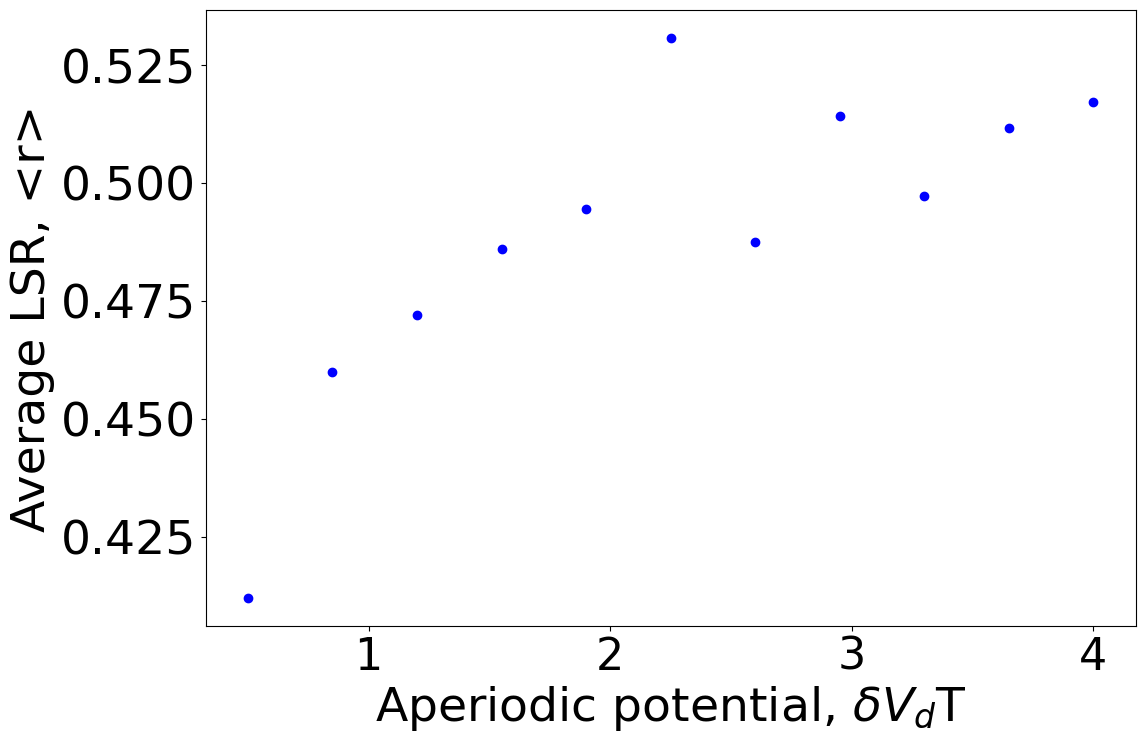

In [20]:
avg_LSR1 = model_afai2.avg_level_spacing_bulk(100, vd, fully_disorder= False ,plot=True)

In [21]:
model101 = afai_parallel.tb_floquet_pbc_cuda(period1, 1, hopping3, 20, device='cuda:0')

torch.Size([11, 40])
[[-2.92511529 -2.6741512  -2.5417021  -2.38455429 -2.22081449 -2.05859518
  -1.9028695  -1.75757776 -1.62634099 -1.51264262 -1.41976124 -1.35279084
  -1.35017789 -1.336338   -1.32085015 -1.30081365 -1.29769474 -1.28138461
  -1.26890518 -1.24834441  1.24834441  1.26890518  1.28138461  1.29769474
   1.30081365  1.32085015  1.336338    1.35017789  1.35279084  1.41976124
   1.51264262  1.62634099  1.75757776  1.9028695   2.05859518  2.22081449
   2.38455429  2.5417021   2.6741512   2.92511529]
 [-2.92511529 -2.6741512  -2.5417021  -2.38455429 -2.22081449 -2.05859518
  -1.9028695  -1.75757776 -1.62634099 -1.51264262 -1.41976124 -1.35279084
  -1.35017789 -1.336338   -1.32085015 -1.30081365 -1.29769474 -1.28138461
  -1.26890518 -1.24834441  1.24834441  1.26890518  1.28138461  1.29769474
   1.30081365  1.32085015  1.336338    1.35017789  1.35279084  1.41976124
   1.51264262  1.62634099  1.75757776  1.9028695   2.05859518  2.22081449
   2.38455429  2.5417021   2.6741512   2

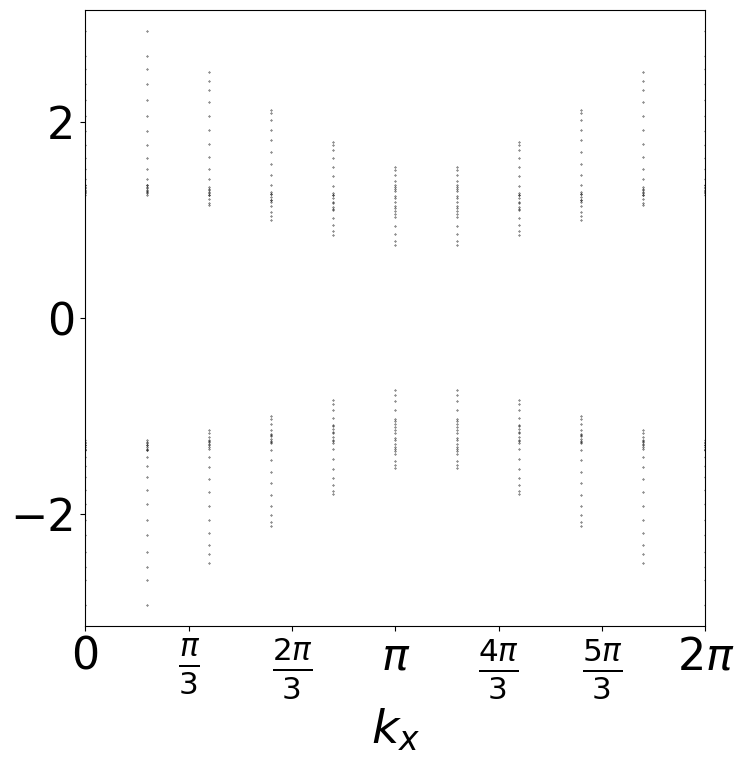

In [23]:
quasi = model101.quasienergy_eigenstates(10, 100, plot=True)

In [43]:
vdT = torch.tensor([1,2,3], device='cuda:0')

In [89]:
thetax, thetay = model_afai2.get_theta_values(40, 'xy')

phi1 is 0 phi2 is 0


c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


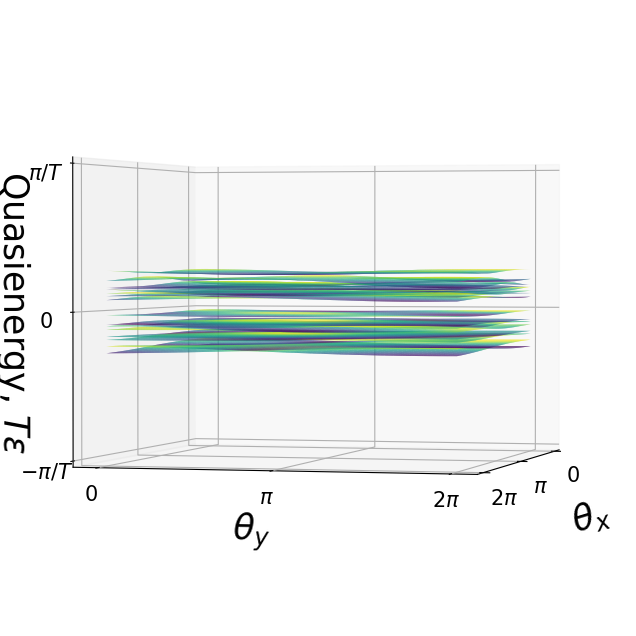

In [100]:
a = model_afai2.quasienergies_states_bulk(100, 0.5, thetax, thetay, fully_disorder=False, plot=True, save_path='bulk_05_quasi.pdf')

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


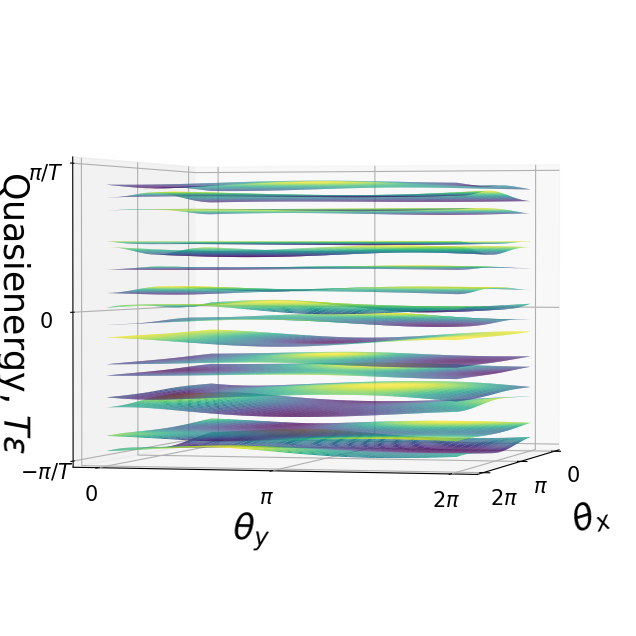

In [97]:
a = model_afai2.quasienergies_states_bulk(100, 30, thetax, thetay, fully_disorder=True, plot=True, save_path='bulk_30.pdf')

phi1 is 0 phi2 is 0


c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:2852: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  


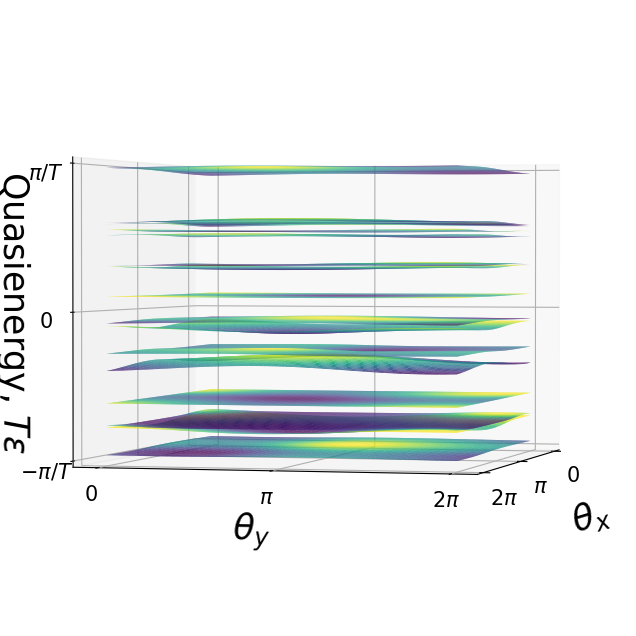

In [98]:
a = model_afai2.quasienergies_states_bulk(100, 30, thetax, thetay, fully_disorder=False, plot=True, save_path='bulk_80_quasi.pdf')

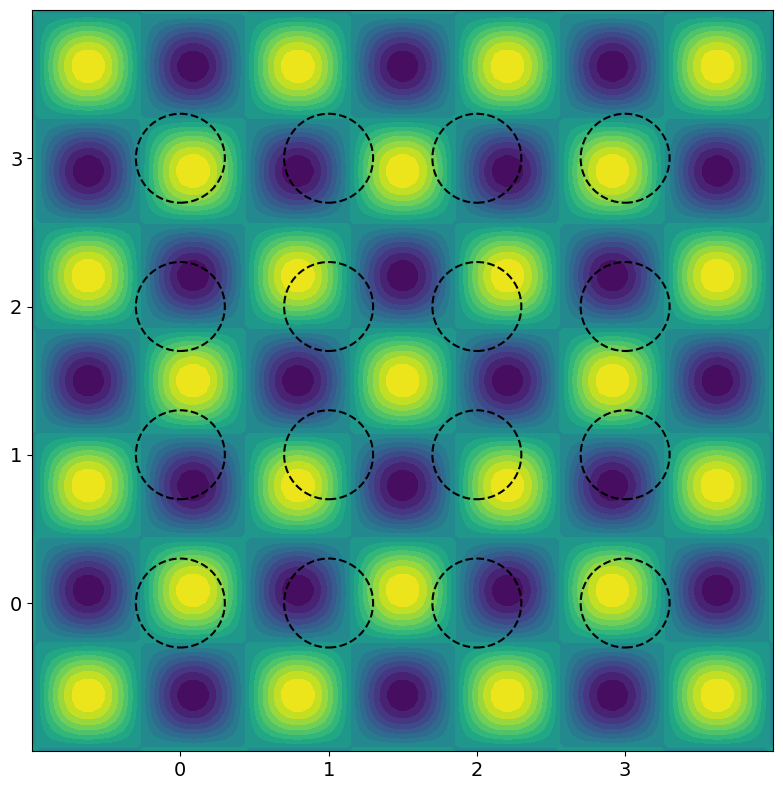

In [111]:
model_afai2.visualise_quasiperiodic(phi1_ex=0, phi2_ex=0)

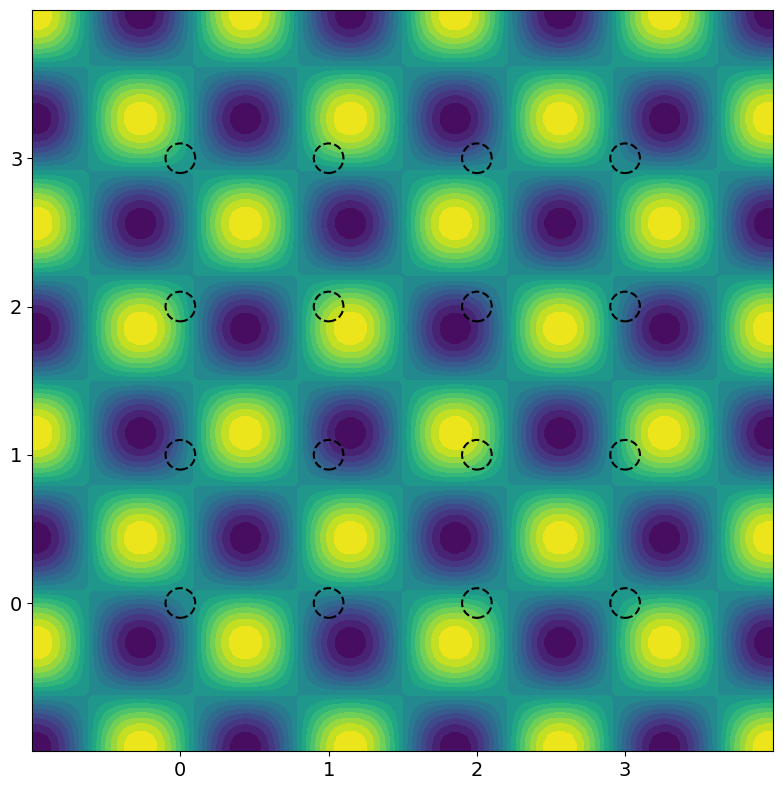

In [115]:
model_afai2.visualise_quasiperiodic(phi1_ex=np.pi, phi2_ex=0)

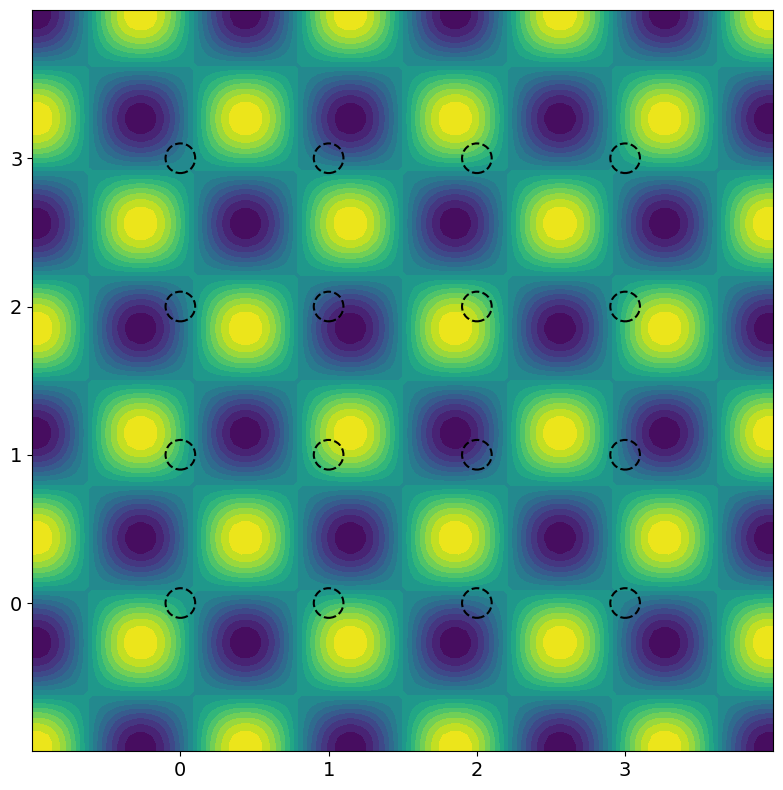

In [116]:
model_afai2.visualise_quasiperiodic(phi1_ex=0, phi2_ex=np.pi)

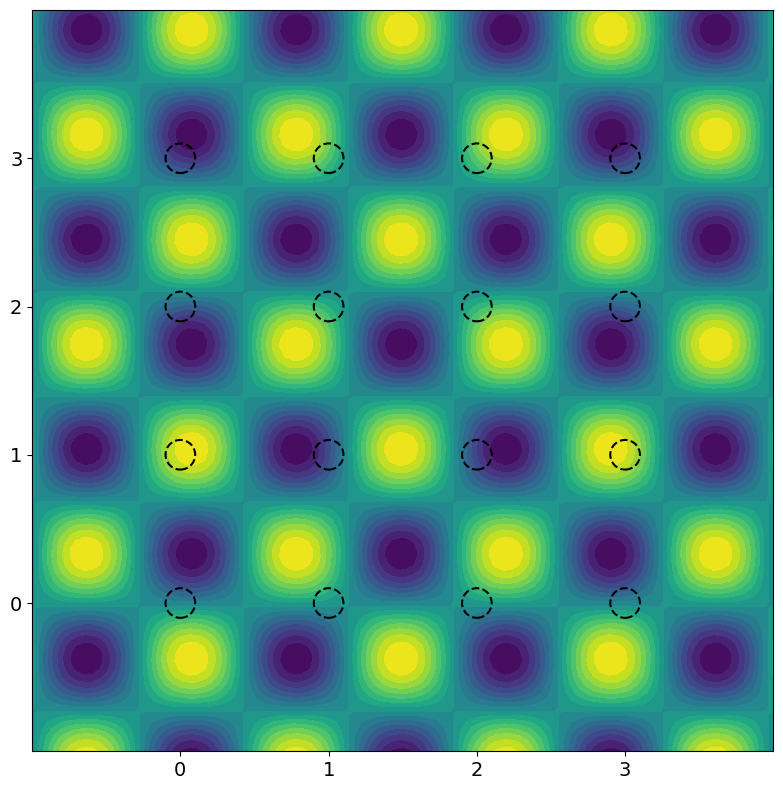

In [117]:
model_afai2.visualise_quasiperiodic(phi1_ex=2, phi2_ex=np.pi*2/3)

In [173]:
import os
# Construct the relative path from the notebook's location to the data file
relative_path = os.path.join('..', 'Data', 'winding_number', 'winding_dis.txt')

In [198]:
model = afai_parallel.tb_floquet_tbc_cuda(2, 1, hopping2, ny=6, nx=6, device='cuda:0')

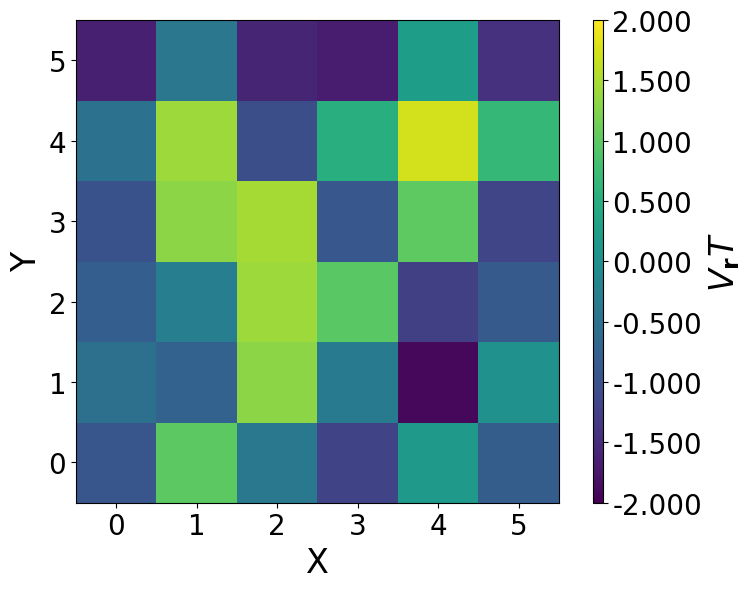

In [308]:
disorder = model.Hamiltonian_disorder(2, initialise=True, contourplot=True, save_path='disorder6.pdf')

In [174]:
# Initialize lists to hold your data
vdT = []
y1 = [] # 0-gap
y2 = [] # pi-gap

# Open the file and read the data
with open(relative_path, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT.append(float(values[0]))
        y1.append(float(values[1]))
        y2.append(float(values[2]))

# Convert lists to numpy arrays if needed for further processing
vdT = np.array(vdT)
y1 = np.array(y1)
y2 = np.array(y2)

print(vdT)

[ 0.5         0.87179488  1.24358976  1.61538458  1.98717952  2.35897446
  2.73076916  3.1025641   3.47435904  3.84615397  4.21794891  4.58974361
  4.96153831  5.33333349  5.70512819  6.07692337  6.44871807  6.82051277
  7.19230795  7.56410265  7.93589735  8.30769253  8.67948723  9.05128193
  9.42307663  9.79487133 10.16666698 10.53846169 10.91025639 11.28205109
 11.65384579 12.02564049 12.39743614 12.76923084 13.14102554 13.51282024
 13.88461494 14.2564106  14.6282053  15.         15.         15.51282024
 16.02564049 16.53846169 17.05128288 17.56410217 18.07692337 18.58974457
 19.10256386 19.61538506 20.12820625 20.64102554 21.15384674 21.66666794
 22.17948723 22.69230843 23.20512772 23.71794891 24.23077011 24.7435894
 25.2564106  25.76922989 26.28205109 26.79487228 27.30769157 27.82051277
 28.33333206 28.84615326 29.35897446 29.87179375 30.38461494 30.89743614
 31.41025543 31.92307663 32.43589783 32.94871902 33.46154022 33.9743576
 34.4871788  35.         35.         35.76922989 36.5

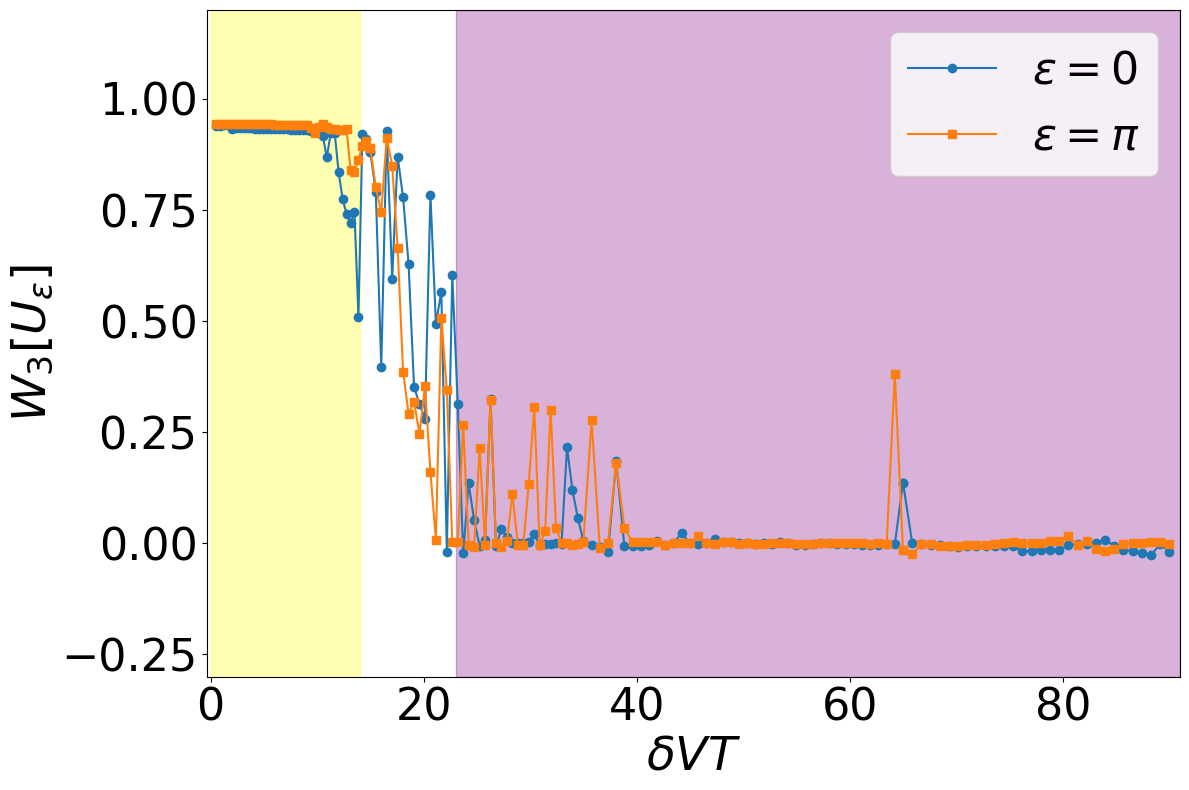

In [208]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot y1 with label for epsilon = 0
ax.plot(vdT, y1, label=r'$\varepsilon = 0$', marker='o')

# Plot y2 with label for epsilon = pi
ax.plot(vdT, y2, label=r'$\varepsilon = \pi$', marker='s')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'$W_3[U_\varepsilon]$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# Add a legend with the specified font size
ax.legend(fontsize=32)
ax.set_ylim(-0.3, 1.2)
ax.set_xlim(-0.3, 91)
# Add a colored window on the x-axis
x_min = 0.0  # starting x value of the window
x_max = 14.0  # ending x value of the window
ax.axvspan(x_min, x_max, color='yellow', alpha=0.3)

x_min_trivial = 23 ## Starting vdT value for the topologically trivial phase
x_max_trivial = 91
ax.axvspan(x_min_trivial, x_max_trivial, color='purple', alpha=0.3)
# Show the plot
plt.tight_layout()
plt.savefig('bulkwinding_disorder_6.pdf')
plt.show()

Using edge invariant in a 30x30 system with grid density = 30

In [178]:
relative_path_edge_dis = os.path.join('..', 'Data', 'winding_number', 'winding_dis_edge.txt')

In [179]:
# Initialize lists to hold your data
vdT_edge_dis = []
y1_edge_dis = [] # 0-gap
y2_edge_dis = [] # pi-gap

# Open the file and read the data
with open(relative_path_edge_dis, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[4:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT_edge_dis.append(float(values[0]))
        y1_edge_dis.append(float(values[1]))
        y2_edge_dis.append(float(values[2]))

# Convert lists to numpy arrays if needed for further processing
vdT_edge_dis = np.array(vdT_edge_dis)
y1_edge_dis = np.array(y1_edge_dis)
y2_edge_dis = np.array(y2_edge_dis)

print(vdT_edge_dis)

[ 0.5         0.87179488  1.24358976  1.61538458  1.98717952  2.35897446
  2.73076916  3.1025641   3.47435904  3.84615397  4.21794891  4.58974361
  4.96153831  5.33333349  5.70512819  6.07692337  6.44871807  6.82051277
  7.19230795  7.56410265  7.93589735  8.30769253  8.67948723  9.05128193
  9.42307663  9.79487133 10.16666698 10.53846169 10.91025639 11.28205109
 11.65384579 12.02564049 12.39743614 12.76923084 13.14102554 13.51282024
 13.88461494 14.2564106  14.6282053  15.         15.51282024 16.02564049
 16.53846169 17.05128288 17.56410217 18.07692337 18.58974457 19.10256386
 19.61538506 20.12820625 20.64102554 21.15384674 21.66666794 22.17948723
 22.69230843 23.20512772 23.71794891 24.23077011 24.7435894  25.2564106
 25.76922989 26.28205109 26.79487228 27.30769157 27.82051277 28.33333206
 28.84615326 29.35897446 29.87179375 30.38461494 30.89743614 31.41025543
 31.92307663 32.43589783 32.94871902 33.46154022 33.9743576  34.4871788
 35.         35.         36.45833206 37.91666794 39.3

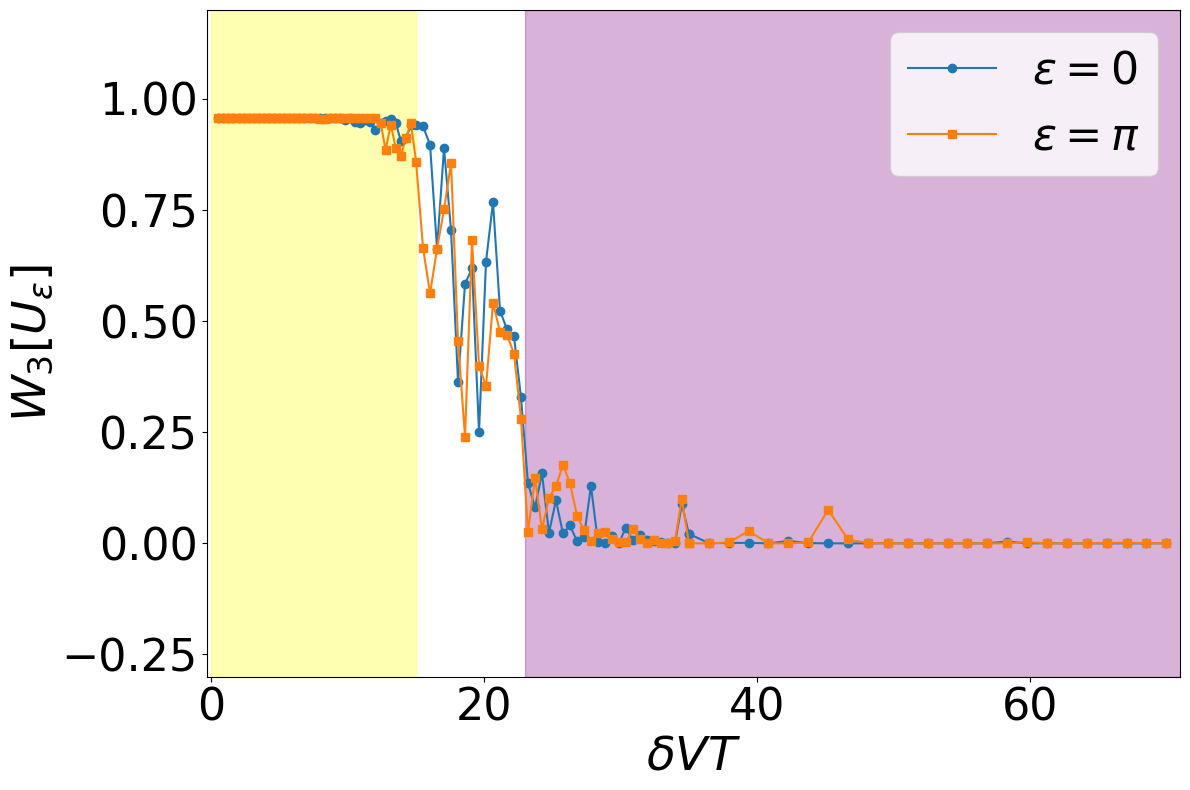

In [219]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot y1 with label for epsilon = 0
ax.plot(vdT_edge_dis, y1_edge_dis, label=r'$\varepsilon = 0$', marker='o')

# Plot y2 with label for epsilon = pi
ax.plot(vdT_edge_dis, y2_edge_dis, label=r'$\varepsilon = \pi$', marker='s')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'$W_3[U_\varepsilon]$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# Add a legend with the specified font size
ax.legend(fontsize=32)
ax.set_ylim(-0.3, 1.2)
ax.set_xlim(-0.3, 71)
# Add a colored window on the x-axis
x_min_afai = 0  # starting x value of the window
x_max_afai = 15.0  # ending x value of the window
ax.axvspan(x_min_afai, x_max_afai, color='yellow', alpha=0.3)

x_min_trivial = 23 ## Starting vdT value for the topologically trivial phase
x_max_trivial = 73
ax.axvspan(x_min_trivial, x_max_trivial, color='purple', alpha=0.3)
# Show the plot
plt.tight_layout()
plt.savefig('edgewinding_disorder_30.pdf')
plt.show()

Quasiperiodic: central flower like configuration

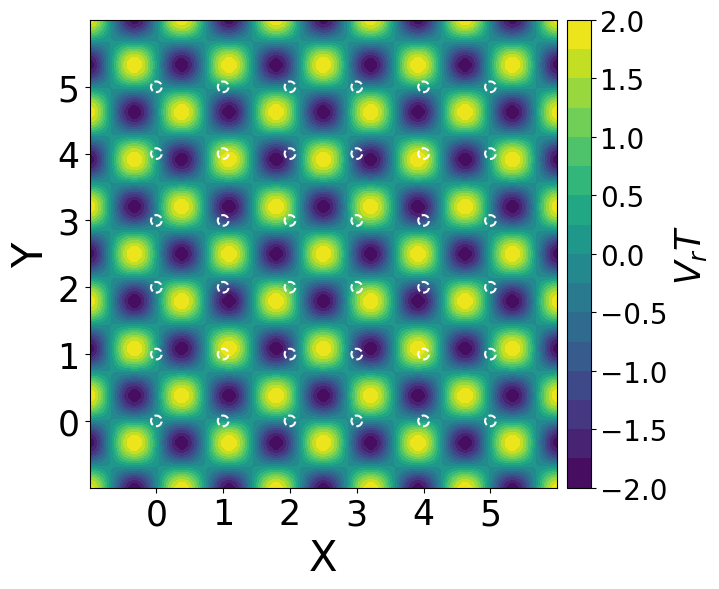

In [217]:
model.visualise_quasiperiodic(circle_size = 0.08, phi1_ex=0, phi2_ex=0, circle_color='white', colorbar=True, save_path='quasi_0_0.pdf')

In [225]:
relative_path_quasi1 = os.path.join('..', 'Data', 'winding_number', 'winding_quasi1.txt')

In [226]:
# Initialize lists to hold your data
vdT_quasi1 = []
y1_quasi1 = [] # 0-gap
y2_quasi1 = [] # pi-gap

# Open the file and read the data
with open(relative_path_quasi1, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT_quasi1.append(float(values[0]))
        y1_quasi1.append(float(values[1]))
        y2_quasi1.append(float(values[2]))

# Convert lists to numpy arrays if needed for further processing
vdT_quasi1 = np.array(vdT_quasi1)
y1_quasi1 = np.array(y1_quasi1)
y2_quasi1 = np.array(y2_quasi1)

print(vdT_quasi1)

[  0.5          0.87179488   1.24358976   1.61538458   1.98717952
   2.35897446   2.73076916   3.1025641    3.47435904   3.84615397
   4.21794891   4.58974361   4.96153831   5.33333349   5.70512819
   6.07692337   6.44871807   6.82051277   7.19230795   7.56410265
   7.93589735   8.30769253   8.67948723   9.05128193   9.42307663
   9.79487133  10.16666698  10.53846169  10.91025639  11.28205109
  11.65384579  12.02564049  12.39743614  12.76923084  13.14102554
  13.51282024  13.88461494  14.2564106   14.6282053   15.
  15.          15.51282024  16.02564049  16.53846169  17.05128288
  17.56410217  18.07692337  18.58974457  19.10256386  19.61538506
  20.12820625  20.64102554  21.15384674  21.66666794  22.17948723
  22.69230843  23.20512772  23.71794891  24.23077011  24.7435894
  25.2564106   25.76922989  26.28205109  26.79487228  27.30769157
  27.82051277  28.33333206  28.84615326  29.35897446  29.87179375
  30.38461494  30.89743614  31.41025543  31.92307663  32.43589783
  32.94871902  33.4

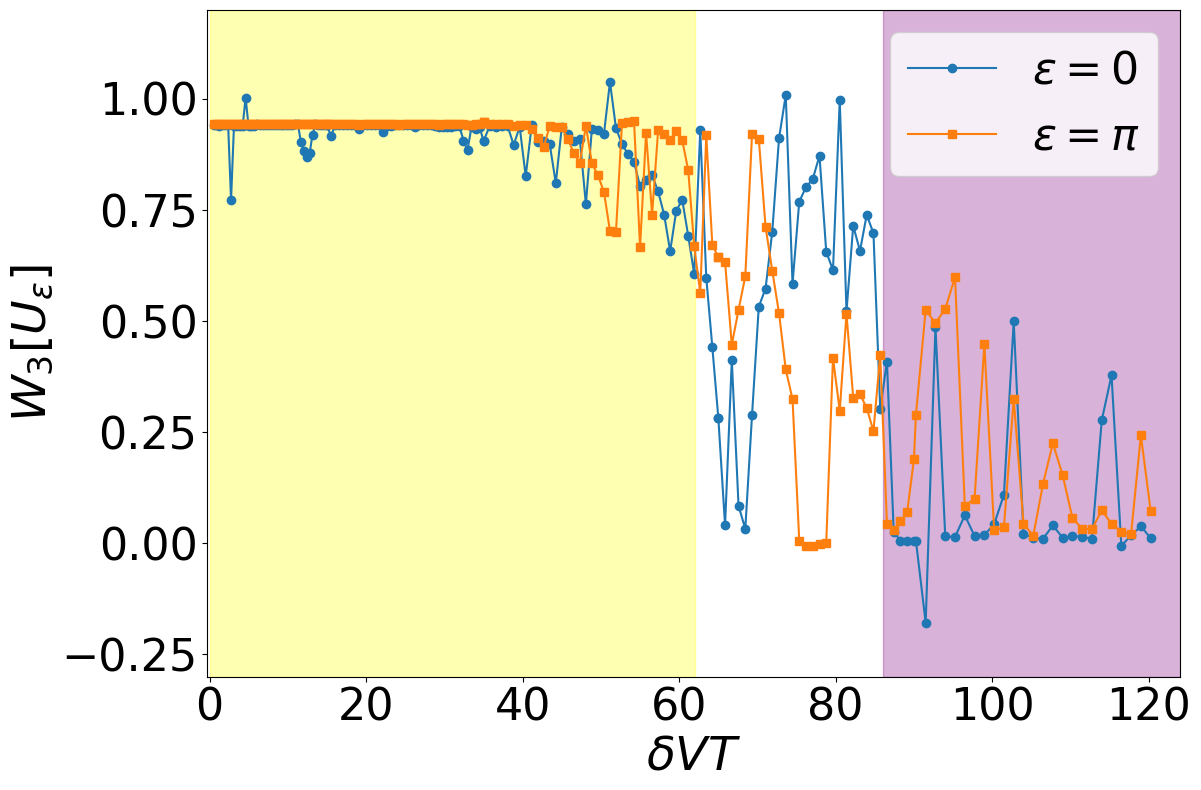

In [232]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot y1 with label for epsilon = 0
ax.plot(vdT_quasi1, y1_quasi1, label=r'$\varepsilon = 0$', marker='o')

# Plot y2 with label for epsilon = pi
ax.plot(vdT_quasi1, y2_quasi1, label=r'$\varepsilon = \pi$', marker='s')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'$W_3[U_\varepsilon]$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# Add a legend with the specified font size
ax.legend(fontsize=32)
ax.set_ylim(-0.3, 1.2)
ax.set_xlim(-0.3, 124)
# Add a colored window on the x-axis
x_min_afai = 0  # starting x value of the window
x_max_afai = 62  # ending x value of the window
ax.axvspan(x_min_afai, x_max_afai, color='yellow', alpha=0.3)

x_min_trivial = 86 ## Starting vdT value for the topologically trivial phase
x_max_trivial = 125
ax.axvspan(x_min_trivial, x_max_trivial, color='purple', alpha=0.3)
# Show the plot
plt.tight_layout()
plt.savefig('bulkwinding_quasi_1.pdf')
plt.show()

Edge invariant of the central flower like configuration

In [287]:
relative_path_quasi1_edge = os.path.join('..', 'Data', 'winding_number', 'winding_quasi1_edge.txt')

In [288]:
# Initialize lists to hold your data
vdT_quasi1_edge = []
y1_quasi1_edge = [] # 0-gap
y2_quasi1_edge = [] # pi-gap

# Open the file and read the data
with open(relative_path_quasi1_edge, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT_quasi1_edge.append(float(values[0]))
        y1_quasi1_edge.append(float(values[1]))
        y2_quasi1_edge.append(float(values[2]))

# Convert lists to numpy arrays if needed for further processing
vdT_quasi1_edge = np.array(vdT_quasi1_edge)
y1_quasi1_edge = np.array(y1_quasi1_edge)
y2_quasi1_edge = np.array(y2_quasi1_edge)

print(vdT_quasi1_edge)

[ 15.          16.05263138  17.10526276  18.15789413  19.21052551
  20.2631588   21.31579018  22.36842155  23.42105293  24.47368431
  25.52631569  26.57894707  27.63157845  28.68420982  29.7368412
  30.78947449  31.84210587  32.89473724  33.94736862  35.
  35.          36.45833206  37.91666794  39.375       40.83333206
  42.29166794  43.75        45.20833206  46.66666794  48.125
  49.58333206  51.04166794  52.5         53.95833206  55.41666794
  56.875       58.33333206  59.79166794  61.25        62.70833206
  64.16666412  65.625       67.08333588  68.54166412  70.
  70.          71.25        72.5         73.75        75.
  76.25        77.5         78.75        80.          81.25
  82.5         83.75        85.          86.25        87.5
  88.75        90.          91.25        92.5         93.75
  95.          96.25        97.5         98.75       100.
 100.25       101.5        102.75       104.         105.25
 106.5        107.75       109.         110.25       111.5
 112.75       

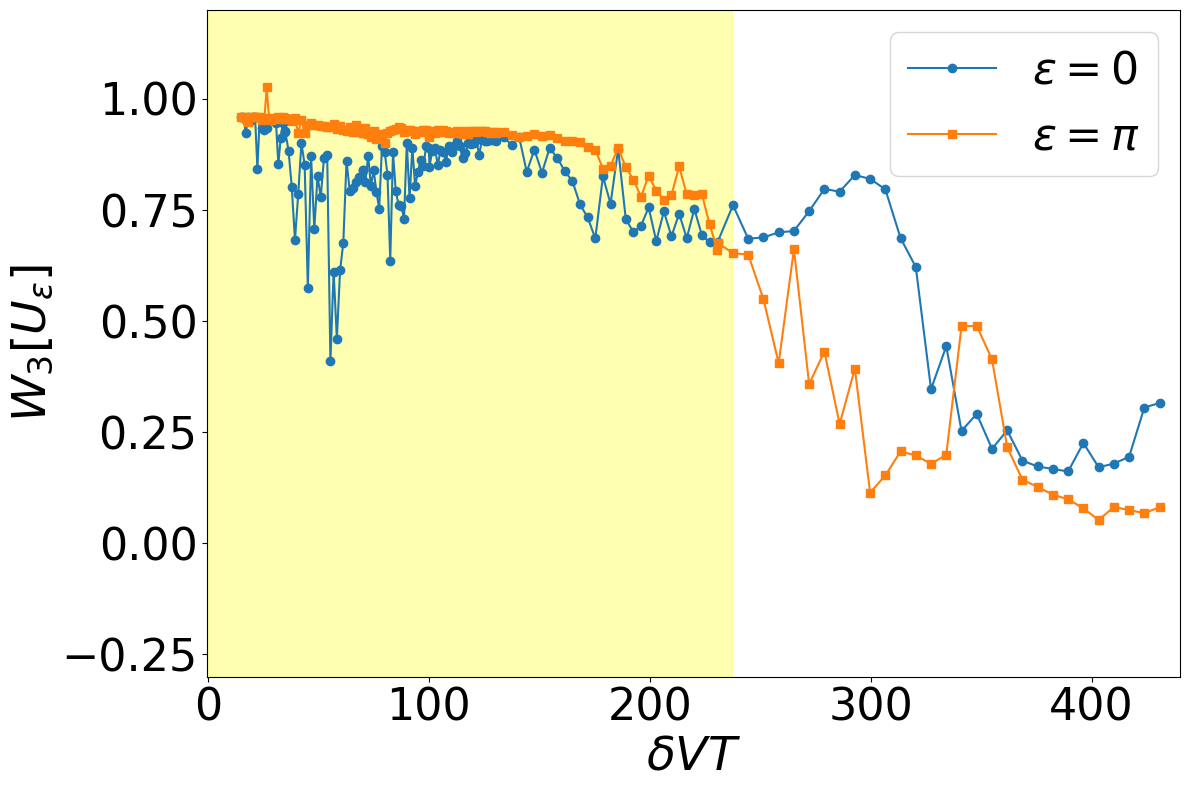

In [293]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot y1 with label for epsilon = 0
ax.plot(vdT_quasi1_edge, y1_quasi1_edge, label=r'$\varepsilon = 0$', marker='o')

# Plot y2 with label for epsilon = pi
ax.plot(vdT_quasi1_edge, y2_quasi1_edge, label=r'$\varepsilon = \pi$', marker='s')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'$W_3[U_\varepsilon]$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# Add a legend with the specified font size
ax.legend(fontsize=32)
ax.set_ylim(-0.3, 1.2)
ax.set_xlim(-0.3, 440)
# Add a colored window on the x-axis
x_min_afai = 0  # starting x value of the window
x_max_afai = 237  # ending x value of the window
ax.axvspan(x_min_afai, x_max_afai, color='yellow', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

Quasiperiodic: configuration like the plot below

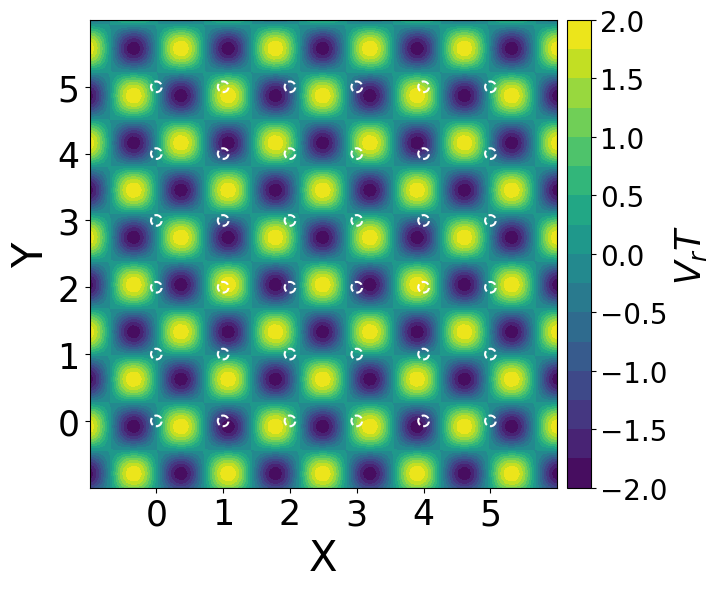

In [218]:
model.visualise_quasiperiodic(phi1_ex=2, phi2_ex=np.pi*2/3, circle_size = 0.08, circle_color='white', colorbar=True, save_path='quasi_phi.pdf')

In [132]:
relative_path_quasi2 = os.path.join('..', 'Data', 'winding_number', 'winding_quasi2.txt')

In [133]:
# Initialize lists to hold your data
vdT_quasi2 = []
y1_quasi2 = [] # 0-gap
y2_quasi2 = [] # pi-gap

# Open the file and read the data
with open(relative_path_quasi2, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT_quasi2.append(float(values[0]))
        y1_quasi2.append(float(values[1]))
        y2_quasi2.append(float(values[2]))

# Convert lists to numpy arrays if needed for further processing
vdT_quasi2 = np.array(vdT_quasi2)
y1_quasi2 = np.array(y1_quasi2)
y2_quasi2 = np.array(y2_quasi2)

print(vdT_quasi2)

[ 0.5         0.87179488  1.24358976  1.61538458  1.98717952  2.35897446
  2.73076916  3.1025641   3.47435904  3.84615397  4.21794891  4.58974361
  4.96153831  5.33333349  5.70512819  6.07692337  6.44871807  6.82051277
  7.19230795  7.56410265  7.93589735  8.30769253  8.67948723  9.05128193
  9.42307663  9.79487133 10.16666698 10.53846169 10.91025639 11.28205109
 11.65384579 12.02564049 12.39743614 12.76923084 13.14102554 13.51282024
 13.88461494 14.2564106  14.6282053  15.         15.         15.51282024
 16.02564049 16.53846169 17.05128288 17.56410217 18.07692337 18.58974457
 19.10256386 19.61538506 20.12820625 20.64102554 21.15384674 21.66666794
 22.17948723 22.69230843 23.20512772 23.71794891 24.23077011 24.7435894
 25.2564106  25.76922989 26.28205109 26.79487228 27.30769157 27.82051277
 28.33333206 28.84615326 29.35897446 29.87179375 30.38461494 30.89743614
 31.41025543 31.92307663 32.43589783 32.94871902 33.46154022 33.9743576
 34.4871788  35.         35.         35.76922989 36.5

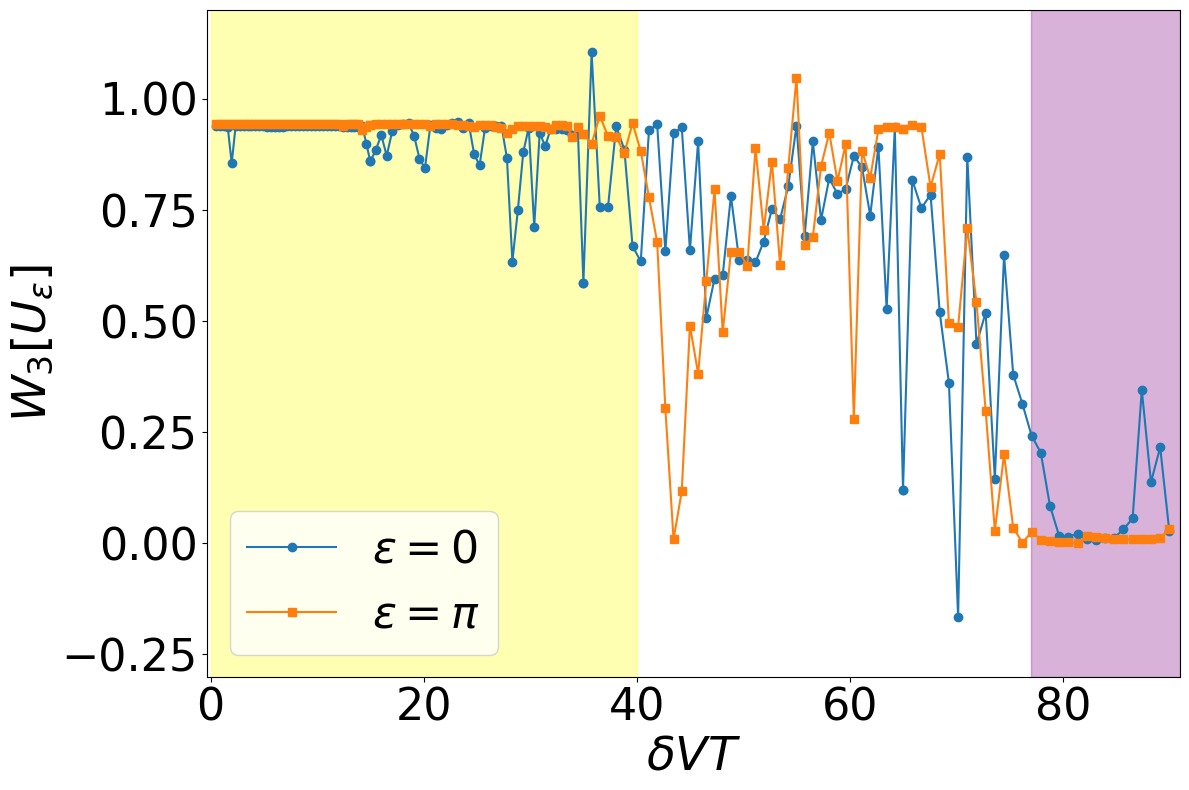

In [309]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot y1 with label for epsilon = 0
ax.plot(vdT_quasi2, y1_quasi2, label=r'$\varepsilon = 0$', marker='o')

# Plot y2 with label for epsilon = pi
ax.plot(vdT_quasi2, y2_quasi2, label=r'$\varepsilon = \pi$', marker='s')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'$W_3[U_\varepsilon]$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# Add a legend with the specified font size
ax.legend(fontsize=32)
ax.set_ylim(-0.3, 1.2)
ax.set_xlim(-0.3, 91)
# Add a colored window on the x-axis
x_min_afai = 0  # starting x value of the window
x_max_afai = 40  # ending x value of the window
ax.axvspan(x_min_afai, x_max_afai, color='yellow', alpha=0.3)

x_min_trivial = 77 ## Starting vdT value for the topologically trivial phase
x_max_trivial = 91
ax.axvspan(x_min_trivial, x_max_trivial, color='purple', alpha=0.3)
# Show the plot
plt.tight_layout()
plt.savefig('bulkwinding_quasi_phi1.pdf')
plt.show()

In [233]:
relative_path_quasi1_LSR = os.path.join('..', 'Data', 'localisation', 'Average LSR', 'quasi_LSR_50.txt')

In [151]:
relative_path_quasi2_LSR = os.path.join('..', 'Data', 'Localisation', 'Average LSR', 'quasi_LSR_50_phi.txt')

In [234]:
# Initialize lists to hold your data
vdT0 = []
LSR0 = []

# Open the file and read the data
with open(relative_path_quasi1_LSR, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT0.append(float(values[0]))
        LSR0.append(float(values[1]))

# Convert lists to numpy arrays if needed for further processing
vdT0 = np.array(vdT0)
LSR0 = np.array(LSR0)

In [235]:
# Initialize lists to hold your data
vdT = []
LSR = []

# Open the file and read the data
with open(relative_path_quasi2_LSR, 'r') as file:
    lines = file.readlines()
    
    # Skip the first two lines (comments) and the third line (header)
    for line in lines[3:]:
        # Split the line into components
        values = line.strip().split(',')
        
        # Append the values to the respective lists
        vdT.append(float(values[0]))
        LSR.append(float(values[1]))

# Convert lists to numpy arrays if needed for further processing
vdT = np.array(vdT)
LSR = np.array(LSR)

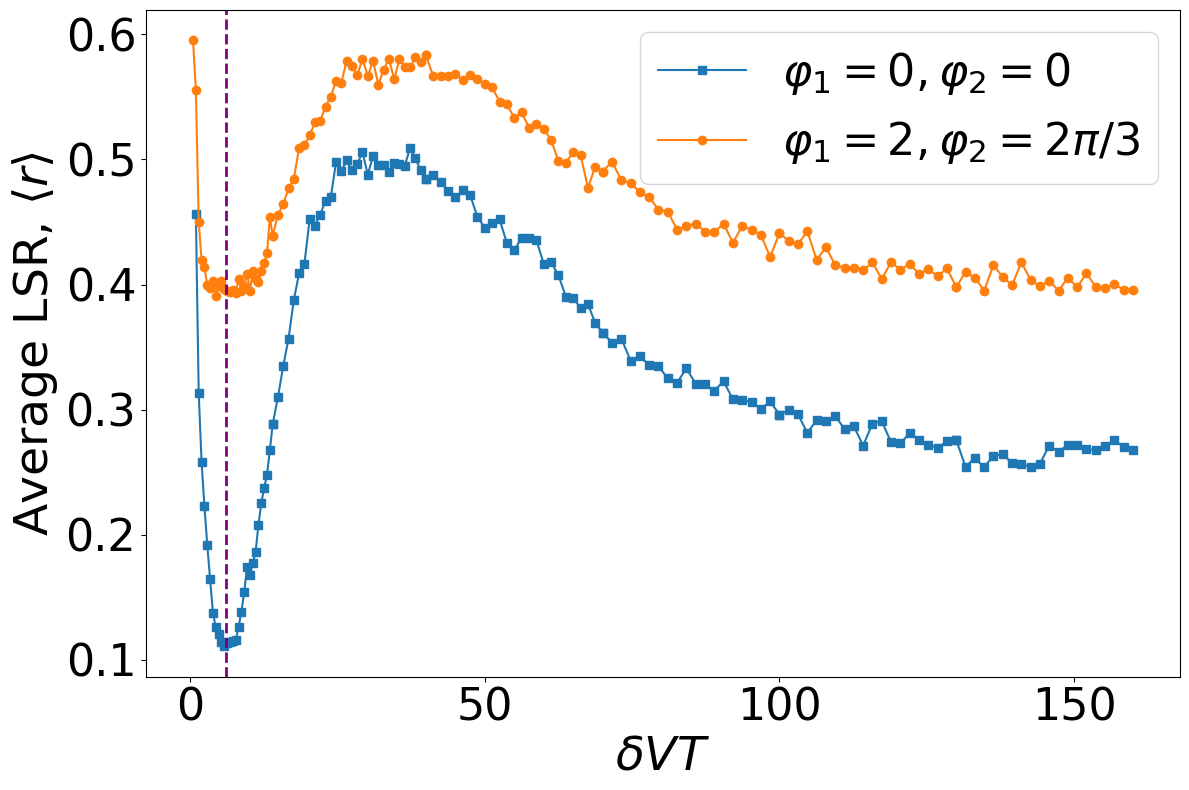

In [310]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot LSR with label
ax.plot(vdT0, LSR0, label=r'$\varphi_1=0, \varphi_2=0$', marker='s')
ax.plot(vdT, LSR, label=r'$\varphi_1=2, \varphi_2=2\pi/3$', marker='o')

# Set labels and fontsize
ax.set_xlabel(r'$\delta VT$', fontsize=34)
ax.set_ylabel(r'Average LSR, $\langle r \rangle$', fontsize=34)

# Set tick label font sizes
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.axvline(x=6, color='purple', linestyle='--', linewidth=2)

# Add a legend with the specified font size
ax.legend(fontsize=32)

# Show the plot
plt.tight_layout()
plt.show()

In [282]:
model_afai0 = afai_parallel.tb_floquet_tbc_cuda(1, 1, hopping3, ny=10, nx=10, device='cuda:0')
model_afai1 = afai_parallel.tb_floquet_tbc_cuda(100, 1, hopping3, ny=10, nx=10, device='cuda:0')

disorder configuration number: 0
tensor([[[ 0.5000]],

        [[ 1.1042]],

        [[ 1.7083]],

        [[ 2.3125]],

        [[ 2.9167]],

        [[ 3.5208]],

        [[ 4.1250]],

        [[ 4.7292]],

        [[ 5.3333]],

        [[ 5.9375]],

        [[ 6.5417]],

        [[ 7.1458]],

        [[ 7.7500]],

        [[ 8.3542]],

        [[ 8.9583]],

        [[ 9.5625]],

        [[10.1667]],

        [[10.7708]],

        [[11.3750]],

        [[11.9792]],

        [[12.5833]],

        [[13.1875]],

        [[13.7917]],

        [[14.3958]],

        [[15.0000]]], device='cuda:0')
torch.Size([25, 100])
disorder configuration number: 1
tensor([[[ 0.5000]],

        [[ 1.1042]],

        [[ 1.7083]],

        [[ 2.3125]],

        [[ 2.9167]],

        [[ 3.5208]],

        [[ 4.1250]],

        [[ 4.7292]],

        [[ 5.3333]],

        [[ 5.9375]],

        [[ 6.5417]],

        [[ 7.1458]],

        [[ 7.7500]],

        [[ 8.3542]],

        [[ 8.9583]],

        [[ 9.56

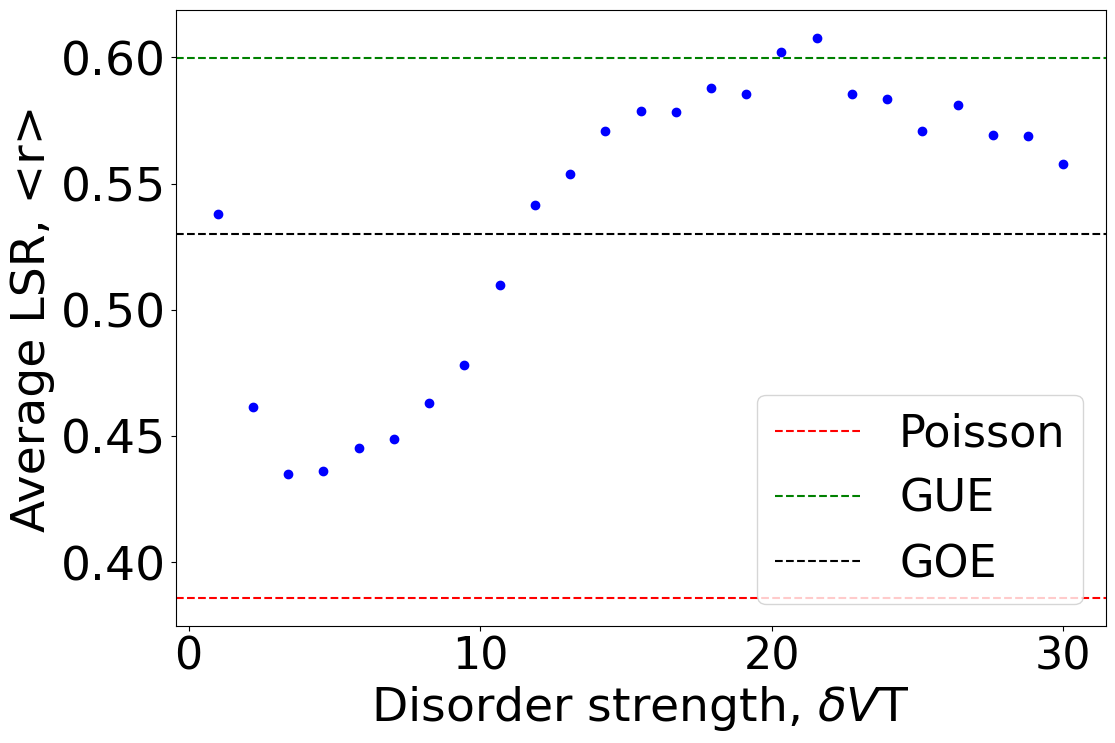

tensor([0.5379, 0.4615, 0.4350, 0.4364, 0.4454, 0.4487, 0.4629, 0.4783, 0.5097,
        0.5416, 0.5538, 0.5706, 0.5786, 0.5784, 0.5879, 0.5855, 0.6022, 0.6077,
        0.5856, 0.5833, 0.5709, 0.5813, 0.5693, 0.5690, 0.5579],
       device='cuda:0')

In [259]:
model_afai0.avg_LSR_disorder_realisation(100, 1 , 30, 25, 20)

disorder configuration number: 0
tensor([[[0.0010]],

        [[0.0014]],

        [[0.0017]],

        [[0.0021]],

        [[0.0025]],

        [[0.0029]],

        [[0.0032]],

        [[0.0036]],

        [[0.0040]],

        [[0.0044]],

        [[0.0047]],

        [[0.0051]],

        [[0.0055]],

        [[0.0059]],

        [[0.0062]],

        [[0.0066]],

        [[0.0070]],

        [[0.0074]],

        [[0.0078]],

        [[0.0081]],

        [[0.0085]],

        [[0.0089]],

        [[0.0093]],

        [[0.0096]],

        [[0.0100]]], device='cuda:0')
random_values tensor([ 0.6143,  0.2254,  0.7354,  0.0845, -0.5012,  0.1709, -0.2425,  0.9553,
        -0.1308,  0.6421,  0.8524, -0.0225,  0.0377,  0.0509, -0.1701, -0.1028,
        -0.1452,  0.8579, -0.7231, -0.0171,  0.9921,  0.4871,  0.6698,  0.6073,
         0.6637, -0.3033, -0.2077,  0.4161, -0.6053, -0.1393,  0.2549,  0.9297,
         0.7718, -0.7327, -0.5731, -0.9716,  0.0307,  0.2032, -0.8474, -0.5901,
         0.

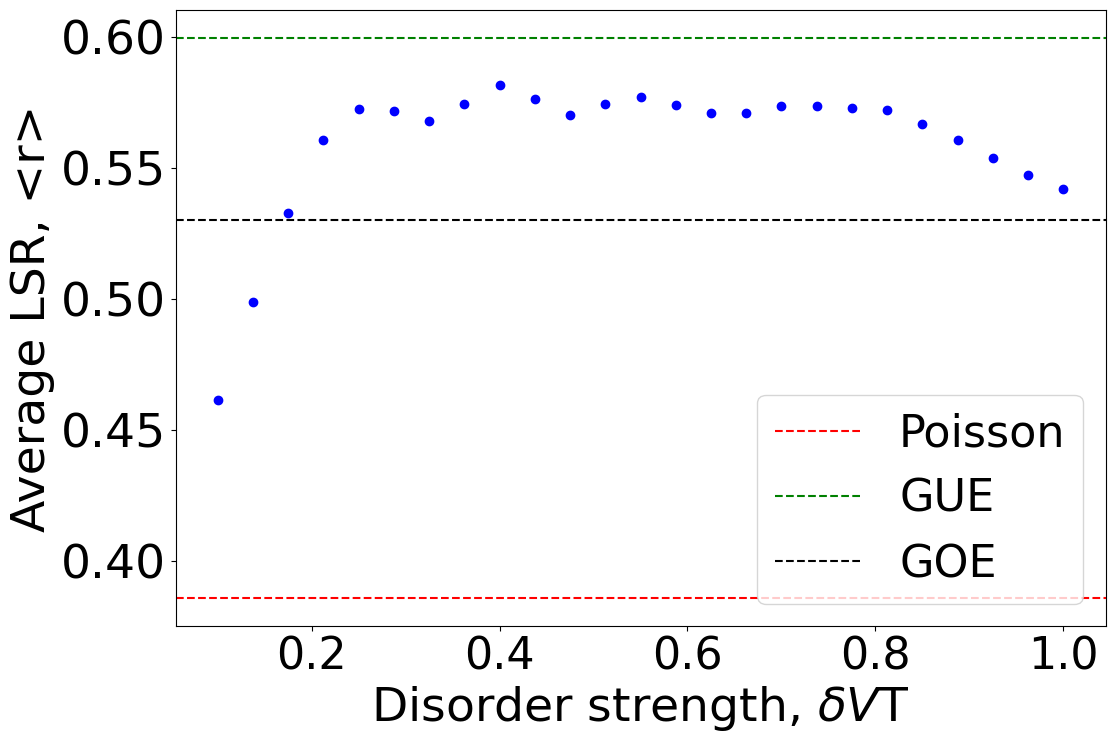

tensor([0.4613, 0.4988, 0.5328, 0.5607, 0.5725, 0.5716, 0.5678, 0.5743, 0.5815,
        0.5761, 0.5702, 0.5741, 0.5770, 0.5741, 0.5708, 0.5711, 0.5737, 0.5737,
        0.5727, 0.5718, 0.5666, 0.5607, 0.5539, 0.5472, 0.5418],
       device='cuda:0')

In [278]:
model_afai1.avg_LSR_disorder_realisation(100, 0.1 , 1, 25, 25)

tensor([0.5000], device='cuda:0')
random_values tensor([-0.2109, -0.9915, -0.0202, -0.8369, -0.8906,  0.0601,  0.2677, -0.0995,
        -0.5014, -0.8790,  0.9471, -0.7988,  0.5942,  0.1411,  0.1097,  0.5252,
         0.1945, -0.1652, -0.2131, -0.9284, -0.3800, -0.8578,  0.9409,  0.1944,
        -0.5251, -0.6366,  0.9653, -0.5469,  0.1881,  0.4002,  0.6854, -0.9463,
        -0.6712, -0.2964, -0.3843,  0.9770,  0.4106,  0.6357, -0.9164,  0.4094,
        -0.0601,  0.4451,  0.8559, -0.9488,  0.6352,  0.2357,  0.1185,  0.9516,
        -0.1965, -0.7185, -0.0456, -0.3699, -0.2365,  0.5003,  0.2973,  0.6263,
        -0.6815, -0.5467, -0.0839, -0.6692, -0.4894, -0.6072,  0.5110,  0.1884,
        -0.5716, -0.2653,  0.5300,  0.6308, -0.1598, -0.3504,  0.6372, -0.1421,
         0.0193,  0.1325,  0.7509,  0.4451,  0.4690, -0.1632,  0.1207,  0.4305,
         0.4378, -0.4598,  0.3680,  0.4698,  0.4297,  0.3098, -0.5351, -0.5065,
        -0.5076,  0.9883,  0.2565,  0.8419,  0.2486, -0.9801,  0.4025,  

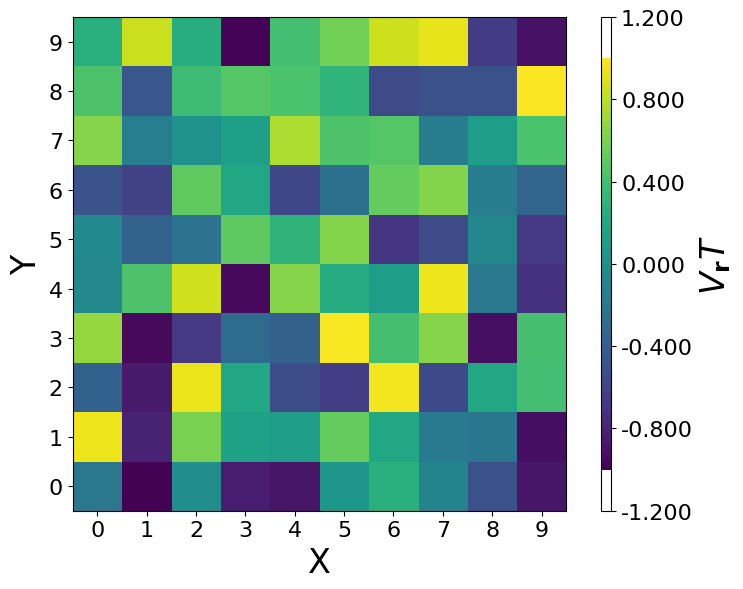

tensor([[-0.1054,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.4957,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.0101,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.4614,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.3222,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.4503]],
       device='cuda:0')

In [277]:
model_afai0.Hamiltonian_disorder(1, initialise=True, contourplot=True)

phi1 is 0 phi2 is 0
[[-0.17179796  0.40933031 -0.04617429 -0.38474372  0.25105375  0.25105542
  -0.38474438 -0.04617503  0.40933192 -0.17179796]
 [ 0.40933192 -0.97528327  0.11001665  0.91669834 -0.59816742 -0.59816837
   0.91669768  0.1100178  -0.97528327  0.40933031]
 [-0.04617503  0.1100178  -0.01241025 -0.10340881  0.06747597  0.06747639
  -0.10340813 -0.01241025  0.11001665 -0.04617429]
 [-0.38474438  0.91669768 -0.10340813 -0.86163241  0.56223553  0.56223625
  -0.86163241 -0.10340881  0.91669834 -0.38474372]
 [ 0.25105542 -0.59816837  0.06747639  0.56223625 -0.36687261 -0.36687261
   0.56223553  0.06747597 -0.59816742  0.25105375]
 [ 0.25105375 -0.59816742  0.06747597  0.56223553 -0.36687261 -0.36687261
   0.56223625  0.06747639 -0.59816837  0.25105542]
 [-0.38474372  0.91669834 -0.10340881 -0.86163241  0.56223625  0.56223553
  -0.86163241 -0.10340813  0.91669768 -0.38474438]
 [-0.04617429  0.11001665 -0.01241025 -0.10340813  0.06747639  0.06747597
  -0.10340881 -0.01241025  0.11

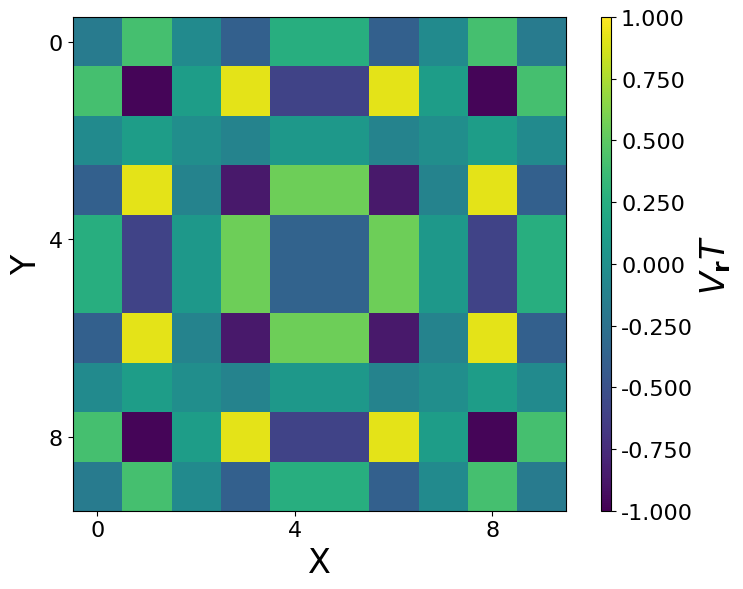

In [286]:
aa = model_afai0.aperiodic_Honsite(1, contourplot=True)

In [304]:
def plot_dos(quasienergies, T, num_bins=100, save_path=None):
    # Flatten the quasienergies if they're not already 1D
    flat_quasienergies = quasienergies.flatten()

    # Calculate the histogram
    hist, bin_edges = np.histogram(flat_quasienergies, bins=num_bins, range=(-np.pi/T, np.pi/T))
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.plot(hist, bin_centers, 'b-')
    ax.fill_betweenx(bin_centers, 0, hist, alpha=0.3)
    
    # Set labels and ticks
    ax.set_ylabel('Quasienergy, ω', fontsize=14)
    ax.set_xlabel('DOS', fontsize=14)
    ax.set_ylim(-np.pi/T, np.pi/T)
    ax.set_yticks([-np.pi/T, -np.pi/(2*T), 0, np.pi/(2*T), np.pi/T])
    ax.set_yticklabels([r'$-\frac{\pi}{T}$', r'$-\frac{\pi}{2T}$', '0', r'$\frac{\pi}{2T}$', r'$\frac{\pi}{T}$'])
    
    # Invert x-axis to match the image
    ax.invert_xaxis()
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
    plt.show()